In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

## Light Curve Test
In this notebook I give an example of how to read in a light curve Pickle (.pkl) file like those stored in the tess-goddard-lcs bucket on the Breakthrough Listen Sandbox Google Cloud Platform (https://console.cloud.google.com/storage/browser?project=breakthrough-listen-sandbox&prefix=). Here I am following the example given by the 'tess_lc_readme.txt' file in that bucket. 

In [5]:
# Mount the GCP filesystem onto this VM
data_dir = "/home/parsellsx/tesslcs/" # Modify with an appropriate directory on your machine
os.system(f"gcsfuse --implicit-dirs tess-goddard-lcs {data_dir}")

256

In [6]:
# Following the example given in tess_lc_readme.txt on the GCP bucket
fp = open(data_dir + 'tesslcs_sector_1_104/tesslcs_tmag_2_3/tesslc_612256219.pkl','rb')
data = pickle.load(fp)
fp.close()

In [7]:
data[6] # Time values for the light curve

array([1325.32600045, 1325.34683375, 1325.36766705, ..., 1353.11735012,
       1353.13818302, 1353.15901592])

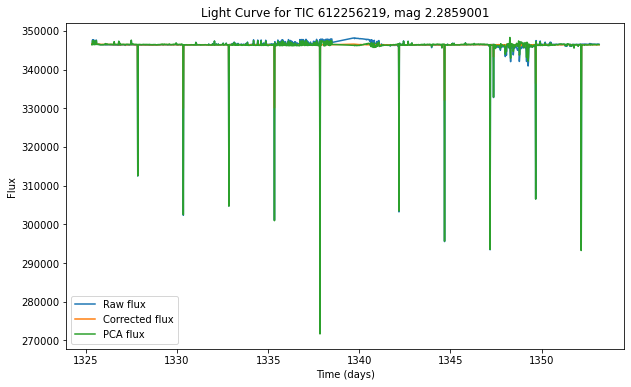

In [8]:
# Plot raw, corrected, and PCA flux on top of each other
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data[6],data[7],label='Raw flux')
plt.plot(data[6],data[8],label='Corrected flux')
plt.plot(data[6],data[9],label='PCA flux')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.title('Light Curve for TIC ' + str(data[0]) + ', mag ' + str(data[3]))
plt.legend(loc='best')

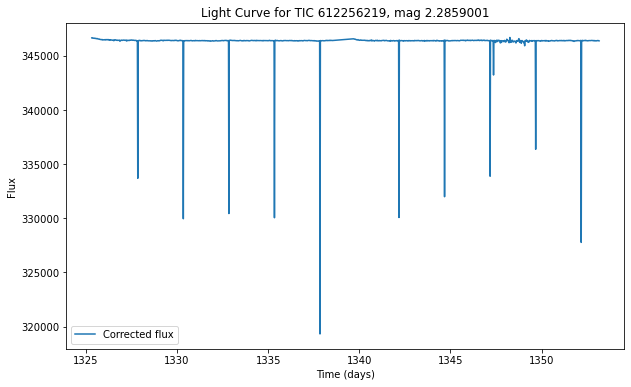

In [10]:
# Plot just the corrected flux
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data[6],data[8],label='Corrected flux')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.title('Light Curve for TIC ' + str(data[0]) + ', mag ' + str(data[3]))
plt.legend(loc='best')

We can see here that even the "corrected" flux (as well as the PCA flux) still has serious issues. Luckily, we can resolve those using the quality flags.

Text(0.5, 1.0, 'Light Curve for TIC 612256219, mag 2.2859001')

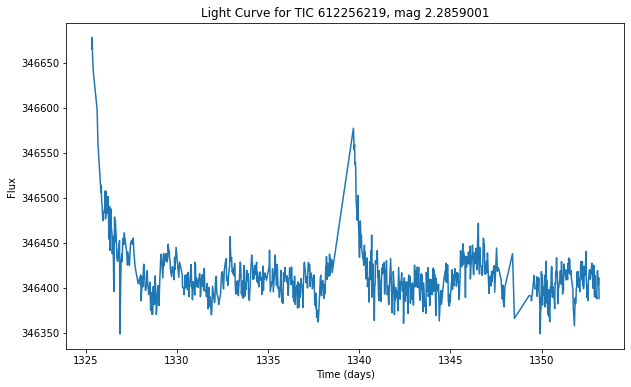

In [9]:
# Now try the same thing but using the quality flags (i.e., data[11])
q = data[11] == 0 # Get indices where data[11] == 0 and call these indices q
time = data[6][q]
flux = data[8][q]
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(time,flux)
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.title('Light Curve for TIC ' + str(data[0]) + ', mag ' + str(data[3]))

Using the quality flags makes a big difference! 